# 汽车型号聚类

市面上的汽车种类繁多，令很多消费者难以选择，不同公司不同产地的不同型号的汽车通过人工对比是一件工作量很大的任务。但是我们可以根据每种汽车的各个参数，利用聚类算法来快速进行聚类，快速识别出性能相似的汽车。


## 1. 数据源

本案例基于 ISLR 包\[R] 中的 Auto 数据，[数据集](http://www.hackdata.cn/question/341/)中共有 392 个样本，每个样本有 8 个变量。



In [1]:
# needed imports
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from sklearn import preprocessing

In [2]:
Auto = pd.read_csv('Auto.csv')
Auto_Hierarchical = Auto
Auto_Kmeans = Auto
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
from scipy.spatial import distance
help(distance.pdist)

Help on function pdist in module scipy.spatial.distance:

pdist(X, metric='euclidean', *args, **kwargs)
    Pairwise distances between observations in n-dimensional space.
    
    See Notes for common calling conventions.
    
    Parameters
    ----------
    X : ndarray
        An m by n array of m original observations in an
        n-dimensional space.
    metric : str or function, optional
        The distance metric to use. The distance function can
        be 'braycurtis', 'canberra', 'chebyshev', 'cityblock',
        'correlation', 'cosine', 'dice', 'euclidean', 'hamming',
        'jaccard', 'jensenshannon', 'kulsinski', 'mahalanobis', 'matching',
        'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
        'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'.
    *args : tuple. Deprecated.
        Additional arguments should be passed as keyword arguments
    **kwargs : dict, optional
        Extra arguments to `metric`: refer to each metric documentation for a

## 2. 层次聚类

### 2.1 数据集标准化处理

In [4]:
Auto_Scaled = preprocessing.scale(Auto.iloc[:,1:8])

In [5]:
Auto_Scaled.shape

(392, 7)

### 2.2 距离计算

In [6]:
# generate the linkage matrix
Z = linkage(Auto_Scaled, 'complete', 'minkowski')

In [7]:
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [8]:
Z.shape

(391, 4)

### 2.3 绘制树状图

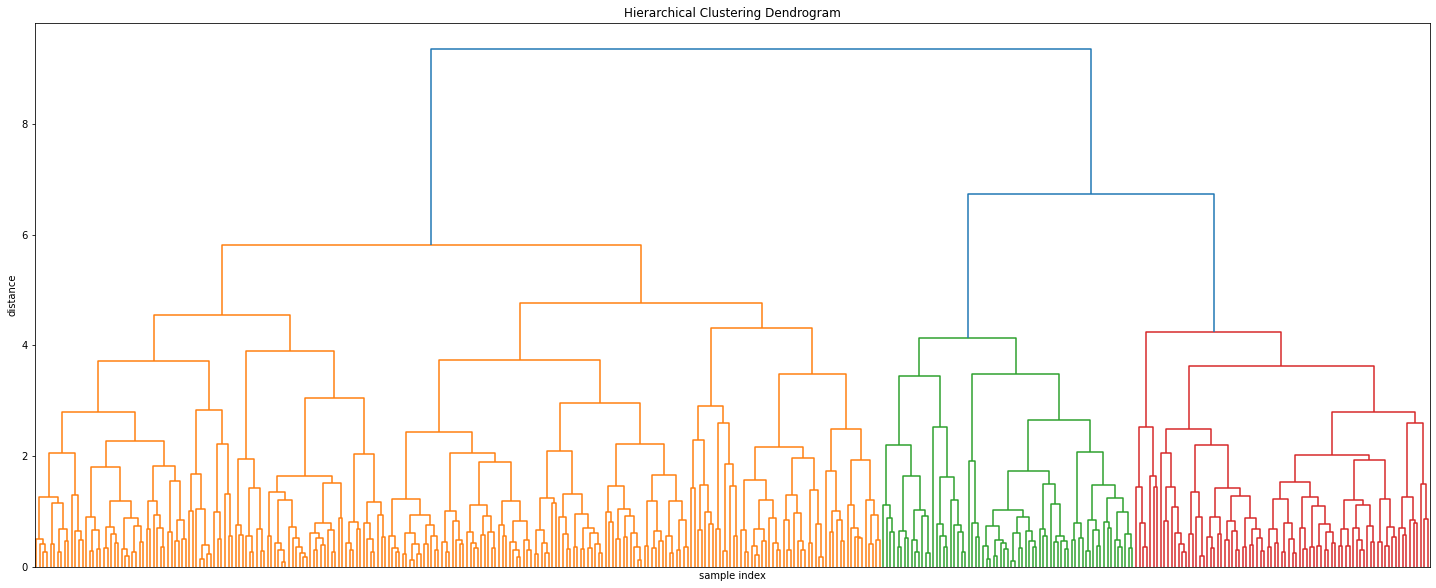

In [9]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    no_labels = True
)
plt.show()

In [10]:
help(dendrogram)

Help on function dendrogram in module scipy.cluster.hierarchy:

dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='C0')
    Plot the hierarchical clustering as a dendrogram.
    
    The dendrogram illustrates how each cluster is
    composed by drawing a U-shaped link between a non-singleton
    cluster and its children. The top of the U-link indicates a
    cluster merge. The two legs of the U-link indicate which clusters
    were merged. The length of the two legs of the U-link represents
    the distance between the child clusters. It is also the
    cophenetic distance between original observations in the two
    children clusters.
    
    Parameters
    ----------
    Z : ndarray
        Th

### 2.4 剪枝过程

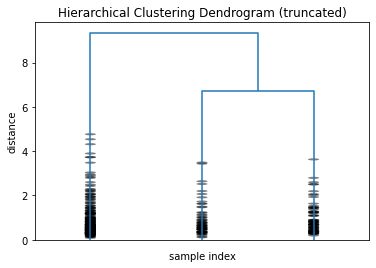

In [11]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

### 2.5 聚类结果

为了便于展示，我们利用MDS方法对距离矩阵进行降维，用不同的颜色来表示聚类的结果


In [12]:
from sklearn import manifold
import numpy as np
seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                n_jobs=1)
pos = mds.fit(Auto_Scaled).embedding_

In [13]:
help(manifold.MDS)

Help on class MDS in module sklearn.manifold._mds:

class MDS(sklearn.base.BaseEstimator)
 |  MDS(n_components=2, *, metric=True, n_init=4, max_iter=300, verbose=0, eps=0.001, n_jobs=None, random_state=None, dissimilarity='euclidean')
 |  
 |  Multidimensional scaling.
 |  
 |  Read more in the :ref:`User Guide <multidimensional_scaling>`.
 |  
 |  Parameters
 |  ----------
 |  n_components : int, default=2
 |      Number of dimensions in which to immerse the dissimilarities.
 |  
 |  metric : bool, default=True
 |      If ``True``, perform metric MDS; otherwise, perform nonmetric MDS.
 |  
 |  n_init : int, default=4
 |      Number of times the SMACOF algorithm will be run with different
 |      initializations. The final results will be the best output of the runs,
 |      determined by the run with the smallest final stress.
 |  
 |  max_iter : int, default=300
 |      Maximum number of iterations of the SMACOF algorithm for a single run.
 |  
 |  verbose : int, default=0
 |      Le

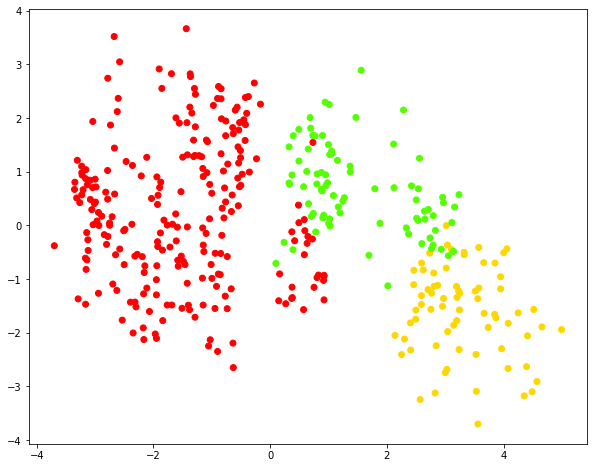

In [14]:
from scipy.cluster.hierarchy import fcluster
k=3
clusters = fcluster(Z, k, criterion='maxclust')

plt.figure(figsize=(10, 8))
plt.scatter(pos[:,0], pos[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

In [15]:
help(fcluster)

Help on function fcluster in module scipy.cluster.hierarchy:

fcluster(Z, t, criterion='inconsistent', depth=2, R=None, monocrit=None)
    Form flat clusters from the hierarchical clustering defined by
    the given linkage matrix.
    
    Parameters
    ----------
    Z : ndarray
        The hierarchical clustering encoded with the matrix returned
        by the `linkage` function.
    t : scalar
        For criteria 'inconsistent', 'distance' or 'monocrit',
         this is the threshold to apply when forming flat clusters.
        For 'maxclust' or 'maxclust_monocrit' criteria,
         this would be max number of clusters requested.
    criterion : str, optional
        The criterion to use in forming flat clusters. This can
        be any of the following values:
    
          ``inconsistent`` :
              If a cluster node and all its
              descendants have an inconsistent value less than or equal
              to `t`, then all its leaf descendants belong to the
    

In [16]:
Auto_Hierarchical['cluster'] = clusters

In [17]:
Auto_Hierarchical.groupby('cluster').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
cluster,,,,,,,,
1,27.999580,4.264706,121.939076,81.840336,2401.105042,16.316807,76.638655,1.936975
2,13.866197,8.000000,359.169014,169.197183,4236.338028,12.321127,72.253521,1.000000
3,18.583133,6.771084,261.289157,113.987952,3553.855422,16.072289,77.277108,1.036145


## 3. K-Means 聚类

与层次聚类相比，K-Means 的聚类过程简单很多：
- 首先对原始数据集做标准化处理
- 其次直接利用 `sklearn.cluster` 中的 `KMeans()` 方法来构建聚类模型
- 最后分组汇总并得出各个簇的整体情况


In [18]:
from sklearn.cluster import KMeans  

In [19]:
#使用默认的K-Means算法  
num_clusters = 3  
clf = KMeans(n_clusters=num_clusters,  n_init=1, verbose=1)  
clf.fit(Auto_Scaled)  
print(clf.labels_)

Initialization complete
Iteration 0, inertia 1336.5391858103685
Iteration 1, inertia 1050.796460588701
Iteration 2, inertia 1032.3495016021855
Iteration 3, inertia 1018.5621090675994
Iteration 4, inertia 1008.7871076604093
Iteration 5, inertia 1008.2938675494868
Converged at iteration 5: strict convergence.
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2 2 0 0 0 0 0 0 2 1 1 1 1 0 2 0 2 2 2 2 2
 1 1 1 1 1 1 1 2 2 2 2 2 0 0 0 0 0 0 2 0 2 0 2 2 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 0 0 0 2 0 0 2 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 0 1 1 1 1 2 0 2 0 0
 2 2 0 1 1 0 0 0 0 1 0 0 1 2 2 2 0 2 0 2 2 2 2 1 1 1 1 1 0 0 0 0 0 2 0 0 0
 0 0 2 2 2 2 1 1 1 1 2 2 2 2 2 1 1 0 2 2 2 0 0 0 2 0 2 0 0 0 0 0 0 0 2 2 0
 1 1 1 1 2 2 2 2 2 2 0 0 2 2 2 2 0 0 0 2 0 1 0 0 2 1 1 1 1 0 2 0 2 0 1 2 1
 1 2 2 2 2 1 1 1 1 0 2 0 2 2 2 0 0 0 0 0 0 2 0 0 0 2 1 1 2 2 2 2 2 2 2 2 2
 2 1 1 1 1 2 0 0 2 0 2 2 0 0 2 0 2 0 0 2 2 2 2 2 1 1 1 1 1 1 1 1 0 0 2 2 2
 1 0 2 2 2 0 0 2 2 2 2 0 0 2 0 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 2 2 2 0 2

In [20]:
Auto_Kmeans['cluster'] = clf.labels_

In [21]:
Auto_Kmeans.groupby('cluster').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
cluster,,,,,,,,
0,29.414085,4.070423,103.852113,79.253521,2280.93662,16.435211,76.563380,2.556338
1,14.715000,7.980000,346.370000,160.550000,4126.91000,12.721000,73.750000,1.000000
2,23.616667,5.126667,178.836667,90.953333,2870.86000,16.575333,76.913333,1.033333


C:\Users\21548\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  from ipykernel import kernelapp as app
C:\Users\21548\Anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\21548\Anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


[0.98318212 0.00850037 0.00831751]
[3.78521638 0.03272613 0.03202212]
[0.98318212 0.00850037]
[3.78521638 0.03272613]
[0.98318212 0.00850037]
[3.78521638 0.03272613]


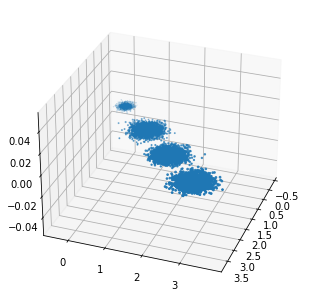

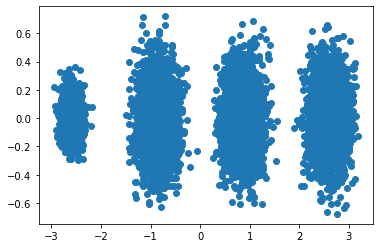

Initialization complete
Iteration 0, inertia 1003.7741139832111
Iteration 1, inertia 656.181794931665
Converged at iteration 1: strict convergence.


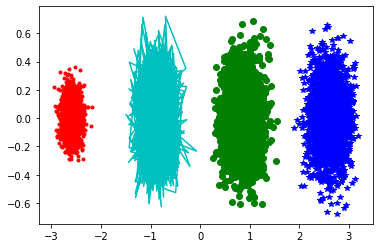

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import preprocessing
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
#X为样本特征，Y为样本簇类别， 共1000个样本，每个样本3个特征，共4个簇
X, y = make_blobs(n_samples=10000, n_features=3, centers=[[3,3, 3], [0,0,0], [1,1,1], [2,2,2]], cluster_std=[0.2, 0.1, 0.2, 0.2], 
                  random_state =9)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o')
#先不降维，只对数据进行投影，看看投影后的三个维度的方差分布
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
#返回所保留的n个成分各自的方差百分比
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
#进行降维，从三维降到2维
pca1 = PCA(n_components=2)
pca1.fit(X)
print(pca1.explained_variance_ratio_)
print(pca1.explained_variance_)
#返回所保留的n个成分各自的方差百分比
print(pca1.explained_variance_ratio_)
print(pca1.explained_variance_)
'''通过对比，因为上面三个投影后的特征维度的方差分别为：
[ 3.78483785  0.03272285  0.03201892]，投影到二维后选择的肯定是前两个特征，而抛弃第三个特征'''
#将降维后的2维数据进行可视化
X_new = pca1.transform(X)
plt.figure()
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
plt.show()

# k-means聚类
d = {'x': X_new[:, 0], 'y': X_new[:, 1]}
X_new = pd.DataFrame(d)
# 中心化
scaled = preprocessing.scale(X_new)
# 聚类
clf = KMeans(n_clusters=4,  n_init=1, verbose=1)  
clf.fit(X_new)
labels = clf.labels_
km = X_new
km['label'] = labels
# tsne = TSNE()
# a = tsne.fit_transform(km)
temp = pd.DataFrame(km, index=km.index)
d1 = temp[km['label']==0]
d2 = temp[km['label']==1]
d3 = temp[km['label']==2]
d4 = temp[km['label']==3]
plt.plot(d1['x'],d1['y'],'r.',d2['x'],d2['y'],'go',d3['x'],d3['y'],'b*', d4['x'], d4['y'], 'c')